In [32]:
'''
Patrick Ballou
ID: 801130521
ECGR 4105
Homework 3
Problem 3
'''

'\nPatrick Ballou\nID: 801130521\nECGR 4105\nHomework 3\nProblem 3\n'

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [34]:
breast = load_breast_cancer()
x = pd.DataFrame(breast['data'])
Y = pd.DataFrame(breast['target'])

In [35]:
#standard scaler is best here
scaler = StandardScaler()
#scaler = MinMaxScaler()
X = scaler.fit_transform(x)

In [36]:
metrics_history = {}
accuracy_history = list()
precision_history = list()
recall_history = list()
for pca_num in range(1, 31):
    pca = PCA(n_components=pca_num)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, train_size=.8, random_state=7)
    
    classifier = GaussianNB()
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    accuracy_history.append(metrics.accuracy_score(Y_test, Y_pred))
    precision_history.append(metrics.precision_score(Y_test, Y_pred))
    recall_history.append(metrics.recall_score(Y_test, Y_pred))

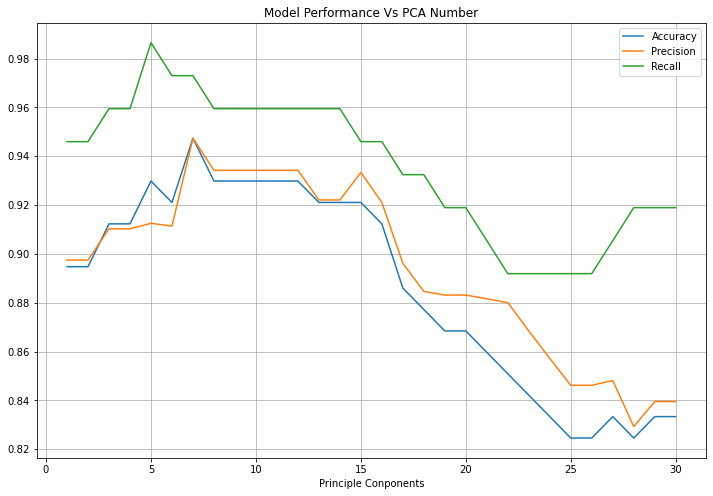

In [37]:
plt.plot(range(1, 31), accuracy_history, label="Accuracy")
plt.plot(range(1, 31), precision_history, label="Precision")
plt.plot(range(1, 31), recall_history, label="Recall")
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel("Principle Conponents")
plt.title("Model Performance Vs PCA Number")
plt.legend()
plt.grid()
plt.show()

In [41]:
#pca_num=7 is the optimal number of components, so now we can evaluate the model
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, train_size=.8, random_state=7)
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [42]:
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))
plt.rcParams["figure.figsize"] = (12,8)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        40
           1       0.95      0.97      0.96        74

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[36  4]
 [ 2 72]]


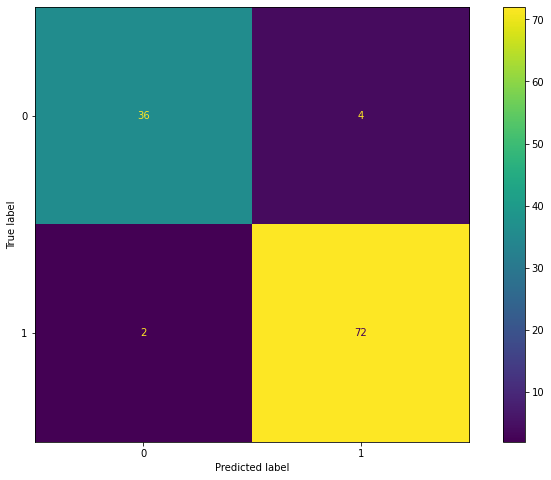

In [43]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(Y_test, Y_pred), display_labels=[0, 1])
cm_display.plot()